In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Natural Language Processing

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Prac/Natural Language Processing/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Cleaning the text

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range (0, 1000):
  review = re.sub('[^a-zA-Z]', " ", dataset['Review'][i])
  review = review.lower()
  review = review.split()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove("not")
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
corpus[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

## Creating the Bag of Words Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countv = CountVectorizer()
x = countv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values
x[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Splitting the Dataset into Test and Training set

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((750, 1566), (250, 1566), (750,), (250,))

## Training the RandomForestClassifier Model on the Training set

In [ ]:
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)
# clf = GaussianNB()
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_preds = clf.predict(x_test)
print(np.concatenate((y_preds.reshape(len(y_preds), 1), y_test.reshape(len(y_test), 1)), 1)[:20])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_preds)
print(cm)

[[106  11]
 [ 52  81]]


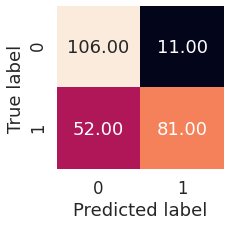

In [ ]:
# Plot a confusion matrix with Seaborn
import seaborn as sns


# Set the font scale
sns.set(font_scale=1.5)


def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False,
                     fmt='.2f')
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

plot_conf_mat(cm)

## Accuracy Score

In [ ]:
accuracy_score(y_test, y_preds)

0.748

## Classification Report

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       117
           1       0.88      0.61      0.72       133

    accuracy                           0.75       250
   macro avg       0.78      0.76      0.75       250
weighted avg       0.78      0.75      0.74       250



## Area Under Receiver Operating Characteristic (ROC) Curve

In [ ]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00854701, 0.00854701, 0.00854701,
       0.00854701, 0.02564103, 0.02564103, 0.02564103, 0.03418803,
       0.03418803, 0.04273504, 0.04273504, 0.04273504, 0.04273504,
       0.05128205, 0.05128205, 0.05982906, 0.05982906, 0.06837607,
       0.07692308, 0.07692308, 0.08547009, 0.08547009, 0.09401709,
       0.09401709, 0.1025641 , 0.1025641 , 0.11965812, 0.11965812,
       0.12820513, 0.12820513, 0.14529915, 0.14529915, 0.14529915,
       0.16239316, 0.16239316, 0.18803419, 0.20512821, 0.20512821,
       0.21367521, 0.23076923, 0.24786325, 0.24786325, 0.25641026,
       0.25641026, 0.27350427, 0.28205128, 0.31623932, 0.33333333,
       0.33333333, 0.34188034, 0.35042735, 0.36752137, 0.36752137,
       0.36752137, 0.37606838, 0.38461538, 0.4017094 , 0.41880342,
       0.41880342, 0.44444444, 0.44444444, 0.46153846, 0.46153

## Visualising ROC AUC

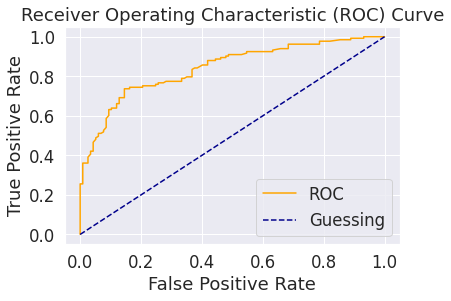

In [ ]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

## Area Under Receiver Operating Characteristic (ROC) Score

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs)

0.8414626309363151